<h1>Object Detection from Image<h1>

In [ ]:
import tensorflow_hub as hub
import cv2 
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
detector = hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")
labels = pd.read_csv("labels.csv")


Enter image name: image.jpeg


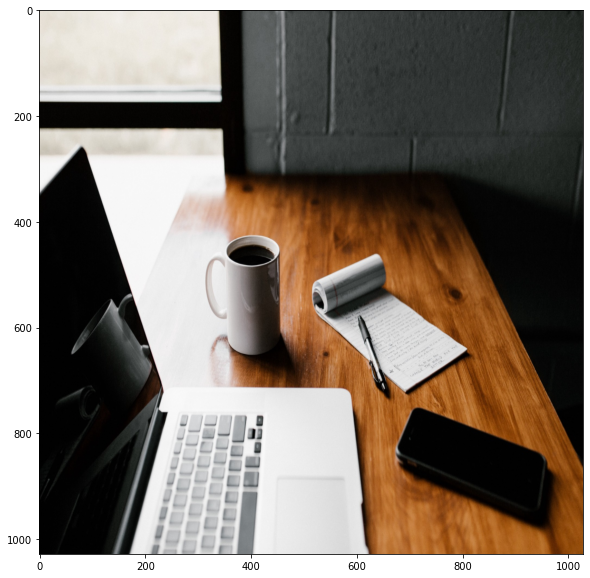

In [ ]:
width = 1028
height = 1028

inp = input("Enter image name: ")


img = cv2.imread(inp)
#Resize to respect the input_shape
inp1 = cv2.resize(img, (width , height ))

#Convert img to RGB
rgb = cv2.cvtColor(inp1, cv2.COLOR_BGR2RGB)

#Is optional but i recommend (float convertion and convert img to tensor image)
rgb_tensor = tf.convert_to_tensor(rgb, dtype=tf.uint8)

#Add dims to rgb_tensor
rgb_tensor = tf.expand_dims(rgb_tensor , 0)

#Now you can use rgb_tensor to predict label for exemple :
plt.figure(figsize=(10,10))
plt.imshow(rgb)

In [ ]:
boxes, scores, classes, num_detections = detector(rgb_tensor)

In [ ]:
labels = pd.read_csv('labels.csv', sep=';', index_col='ID')
labels = labels['OBJECT (2017 REL.)']
labels.head()

ID
1        person
2       bicycle
3           car
4    motorcycle
5      airplane
Name: OBJECT (2017 REL.), dtype: object

In [ ]:
pred_labels = classes.numpy().astype('int')[0]
pred_labels = [labels[i] for i in pred_labels]
pred_boxes = boxes.numpy()[0].astype('int')
pred_scores = scores.numpy()[0]

In [ ]:
for score, (ymin,xmin,ymax,xmax), label in zip(pred_scores, pred_boxes, pred_labels):
  if score < 0.5:
    continue
  
  score_txt = f'{100 * round(score)}%'
  img_boxes = cv2.rectangle(rgb,(xmin,ymax),(xmax,ymin),(0,255,0),2)
  font = cv2.FONT_HERSHEY_SIMPLEX
  cv2.putText(img_boxes, label, (xmin, ymax-10), font, 1.5, (255,0,0), 2, cv2.LINE_AA)
  cv2.putText(img_boxes, score_txt, (xmax, ymax-10), font, 1.5, (255,0,0), 2, cv2.LINE_AA)



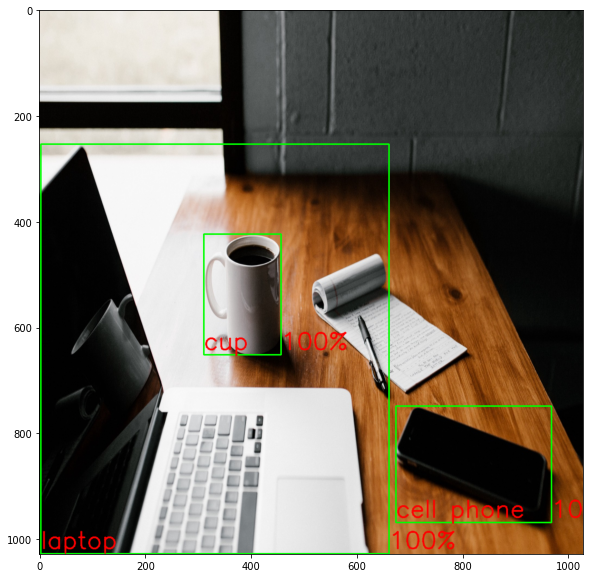

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img_boxes)
img_name = inp+'_pred.jpeg'
plt.savefig(img_name, transparent=True,)